## Importing the data
First define the file name for the historical data

In [1]:
access_tas_hist_file = 'tas_Amon_CCSM4_historical_r1i1p1_185001-200512.nc'

In [125]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import math
import pandas as pd
import seaborn as sns
import calendar

We are defining the data set using the xarray functionality rather than the netcdf4 functionality. By just "opening" the file, we get all of the header information.

In [3]:
dset = xr.open_dataset(access_tas_hist_file)
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 1872)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                historical
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SD BC MD OC Oz AA LU
    parent_experiment_id:         piControl
    parent_experiment_rip:        r1i1p1
    branch_time:              

Since we want to look at the near surface air temperature, however, we can print that itself. Note that this knows better than to print the whole data set.

In order to calculate the mean temperature, we use the xarray functionality that lets us take the mean along a chosen dimension:

In [5]:
clim = dset['tas'].mean('time', keep_attrs=True)
print(clim)

<xarray.DataArray 'tas' (lat: 192, lon: 288)>
array([[225.80315, 225.78839, 225.78973, ..., 225.78545, 225.83345,
        225.83871],
       [226.90501, 226.84827, 226.85497, ..., 226.97078, 226.98337,
        226.89859],
       [228.08298, 227.99568, 227.91112, ..., 228.33023, 228.2529 ,
        228.14891],
       ...,
       [252.32433, 252.33812, 252.35106, ..., 252.28699, 252.29893,
        252.31113],
       [252.2632 , 252.26881, 252.27408, ..., 252.24564, 252.25163,
        252.25743],
       [252.16437, 252.16484, 252.16524, ..., 252.1632 , 252.16368,
        252.16422]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     TREFHT
    comment:           TREFHT no change
    

In [6]:
type(clim.data)

numpy.ndarray

Define the units for plotting purposes

In [45]:
clim.attrs['units']='K'
clim.attrs['vunits']='K^2'

## Plotting the data

Now let's play around with the color bar and the projection. This is the Mollweide projection, which is an equal area projection that does not distort the polar area as much as the projection above (or the one used in the paper).

# Beyond the Mean 
Comparing Mean with Variance across time in the JJA Summer Season 

In [24]:
climseas = dset['tas'].groupby('time.season').mean('time', keep_attrs=True) 
print(climseas)

<xarray.DataArray 'tas' (season: 4, lat: 192, lon: 288)>
array([[[239.89807, 239.85777, 239.84644, ..., 239.8301 , 239.95377,
         239.97597],
        [241.10887, 241.00803, 241.08096, ..., 241.21207, 241.28333,
         241.06004],
        [242.51576, 242.42946, 242.28351, ..., 242.97787, 242.85632,
         242.73856],
        ...,
        [239.19249, 239.21136, 239.22917, ..., 239.14049, 239.15761,
         239.17383],
        [239.01434, 239.0223 , 239.02995, ..., 238.98885, 238.99739,
         239.0059 ],
        [238.78659, 238.78734, 238.7882 , ..., 238.78374, 238.78467,
         238.78577]],

       [[217.54462, 217.54237, 217.55058, ..., 217.55186, 217.56554,
         217.56186],
        [218.72824, 218.68996, 218.66707, ..., 218.78183, 218.7681 ,
         218.7424 ],
        [219.86832, 219.77808, 219.72234, ..., 220.01357, 219.95738,
         219.85678],
...
        [249.56708, 249.58118, 249.59474, ..., 249.52884, 249.54126,
         249.55324],
        [249.48401, 249.

In [75]:
tempvar = dset['tas'].groupby('time.season').var('time', keep_attrs=True) 
print(tempvar)

<xarray.DataArray 'tas' (season: 4, lat: 192, lon: 288)>
array([[[239.89807, 239.85777, 239.84644, ..., 239.8301 , 239.95377,
         239.97597],
        [241.10887, 241.00803, 241.08096, ..., 241.21207, 241.28333,
         241.06004],
        [242.51576, 242.42946, 242.28351, ..., 242.97787, 242.85632,
         242.73856],
        ...,
        [239.19249, 239.21136, 239.22917, ..., 239.14049, 239.15761,
         239.17383],
        [239.01434, 239.0223 , 239.02995, ..., 238.98885, 238.99739,
         239.0059 ],
        [238.78659, 238.78734, 238.7882 , ..., 238.78374, 238.78467,
         238.78577]],

       [[217.54462, 217.54237, 217.55058, ..., 217.55186, 217.56554,
         217.56186],
        [218.72824, 218.68996, 218.66707, ..., 218.78183, 218.7681 ,
         218.7424 ],
        [219.86832, 219.77808, 219.72234, ..., 220.01357, 219.95738,
         219.85678],
...
        [249.56708, 249.58118, 249.59474, ..., 249.52884, 249.54126,
         249.55324],
        [249.48401, 249.

In [114]:
annualindia = dset['tas'].sel(lat=slice(0,30), lon=slice(60,110)).groupby('time.season').var('time', keep_attrs=True) 
print(annual)
annual.head()

<xarray.DataArray 'tas' (season: 2, lat: 192, lon: 288)>
array([[[ 2.384894  ,  2.3986223 ,  2.3225684 , ...,  2.342715  ,
          2.1984065 ,  2.2995012 ],
        [ 2.332733  ,  2.8152668 ,  2.60994   , ...,  2.3558931 ,
          2.432365  ,  2.7977774 ],
        [ 2.5548515 ,  2.566235  ,  2.6508038 , ...,  2.4245665 ,
          2.5036082 ,  2.4820406 ],
        ...,
        [13.942886  , 13.968133  , 13.988206  , ..., 13.876144  ,
         13.8968    , 13.916182  ],
        [13.018662  , 13.021009  , 13.022702  , ..., 13.001013  ,
         13.008838  , 13.014598  ],
        [12.209179  , 12.211131  , 12.212925  , ..., 12.20201   ,
         12.204638  , 12.207014  ]],

       [[ 7.8248253 ,  7.821233  ,  7.807474  , ...,  7.7989855 ,
          7.7665663 ,  7.7970986 ],
        [ 7.9068627 ,  7.975509  ,  7.961727  , ...,  7.9116483 ,
          7.927667  ,  7.9395986 ],
        [ 8.135992  ,  8.121651  ,  8.058239  , ...,  8.435273  ,
          8.343604  ,  8.3736515 ],
        ..

<xarray.DataArray 'tas' (season: 2, lat: 5, lon: 5)>
array([[[2.384894 , 2.3986223, 2.3225684, 2.300466 , 2.2589054],
        [2.332733 , 2.8152668, 2.60994  , 2.6862104, 2.7018423],
        [2.5548515, 2.566235 , 2.6508038, 2.7220137, 2.699934 ],
        [2.5943441, 2.58294  , 2.6585014, 2.6793156, 2.8622081],
        [2.631009 , 2.7092807, 2.9391394, 3.038516 , 3.1342614]],

       [[7.8248253, 7.821233 , 7.807474 , 7.7993283, 7.801249 ],
        [7.9068627, 7.975509 , 7.961727 , 7.934053 , 7.9328747],
        [8.135992 , 8.121651 , 8.058239 , 7.9618764, 7.929815 ],
        [8.180762 , 8.177319 , 8.174506 , 8.147376 , 7.9231253],
        [8.358081 , 8.365285 , 8.171394 , 8.156153 , 8.074343 ]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0
    height   float64 2.0
  * season   (season) object 'DJF' 'JJA'
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     TREFHT
    comment:           TREFHT no change
    cell_methods:      time: mean (interval: 30 days)
    cell_measures:     area: areacella
    history:           2011-10-21T17:19:24Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [157]:
#a = dset['tas'].sel(time=slice('1850', '2005', 6)).groupby('time.season'), keep_attrs=True 
#print(a)

In [123]:
annual = dset['tas'].sel(time=slice('1850', '2005', 6)).groupby('time').var('time.season', keep_attrs=True) 
print(annual)

ValueError: cannot reduce over dimensions ['time.season']. expected either '...' to reduce over all dimensions or one or more of ('lat', 'lon').

In [110]:
annual.head()

<xarray.DataArray 'tas' (season: 2, lat: 5, lon: 5)>
array([[[2.384894 , 2.3986223, 2.3225684, 2.300466 , 2.2589054],
        [2.332733 , 2.8152668, 2.60994  , 2.6862104, 2.7018423],
        [2.5548515, 2.566235 , 2.6508038, 2.7220137, 2.699934 ],
        [2.5943441, 2.58294  , 2.6585014, 2.6793156, 2.8622081],
        [2.631009 , 2.7092807, 2.9391394, 3.038516 , 3.1342614]],

       [[7.8248253, 7.821233 , 7.807474 , 7.7993283, 7.801249 ],
        [7.9068627, 7.975509 , 7.961727 , 7.934053 , 7.9328747],
        [8.135992 , 8.121651 , 8.058239 , 7.9618764, 7.929815 ],
        [8.180762 , 8.177319 , 8.174506 , 8.147376 , 7.9231253],
        [8.358081 , 8.365285 , 8.171394 , 8.156153 , 8.074343 ]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0
    height   float64 2.0
  * season   (season) object 'DJF' 'JJA'
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     TREFHT
    comment:           TREFHT no change
    cell_methods:      time: mean (interval: 30 days)
    cell_measures:     area: areacella
    history:           2011-10-21T17:19:24Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [90]:
annualsummer = annual.sel(season='JJA')
print(annualsummer)

<xarray.DataArray 'tas' (lat: 192, lon: 288)>
array([[7.8248253 , 7.821233  , 7.807474  , ..., 7.7989855 , 7.7665663 ,
        7.7970986 ],
       [7.9068627 , 7.975509  , 7.961727  , ..., 7.9116483 , 7.927667  ,
        7.9395986 ],
       [8.135992  , 8.121651  , 8.058239  , ..., 8.435273  , 8.343604  ,
        8.3736515 ],
       ...,
       [0.5062899 , 0.50555843, 0.5050427 , ..., 0.50835216, 0.50761575,
        0.5070262 ],
       [0.5282157 , 0.5278966 , 0.5275642 , ..., 0.5296302 , 0.529042  ,
        0.5285891 ],
       [0.5382676 , 0.5382351 , 0.5382085 , ..., 0.5383874 , 0.5383426 ,
        0.53830355]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
    season   <U3 'JJA'
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_na

In [98]:
ansumindia = annualsummer.sel(lat=slice(0,30), lon=slice(60,110))
print(ansumindia)

<xarray.DataArray 'tas' (lat: 32, lon: 41)>
array([[0.17257455, 0.17083167, 0.1682933 , ..., 0.19799918, 0.18759231,
        0.19671454],
       [0.16753133, 0.16764311, 0.16619152, ..., 0.19448693, 0.19814776,
        0.18327862],
       [0.16925763, 0.16759078, 0.16389632, ..., 0.18529113, 0.19767651,
        0.20951733],
       ...,
       [2.188046  , 2.258344  , 2.5060604 , ..., 0.43309358, 0.38130486,
        0.38701513],
       [1.844868  , 1.8347698 , 2.086845  , ..., 0.55777395, 0.37683448,
        0.39308962],
       [1.8872242 , 1.7654037 , 1.5849087 , ..., 0.7574689 , 0.4544377 ,
        0.36689284]], dtype=float32)
Coordinates:
  * lat      (lat) float64 0.4712 1.414 2.356 3.298 ... 26.86 27.8 28.74 29.69
  * lon      (lon) float64 60.0 61.25 62.5 63.75 ... 106.2 107.5 108.8 110.0
    height   float64 2.0
    season   <U3 'JJA'
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name: 

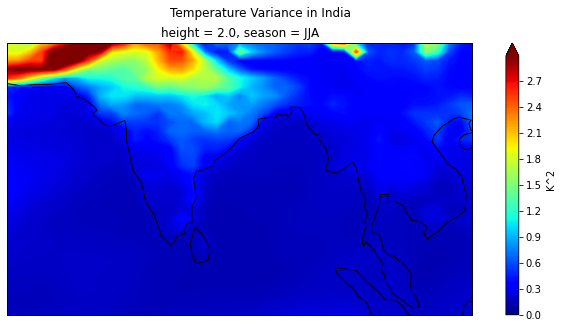

In [112]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

ansumindia.plot.contourf(ax=ax,
                         levels=np.arange(0, 3, .01),
                         extend='max',
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'label': 'K^2'},
                         cmap='jet')
ax.coastlines()
fig.suptitle('Temperature Variance in India')

plt.show()

In [158]:
#ansumindia.head()

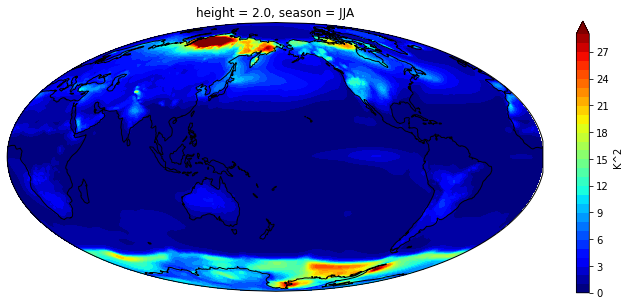

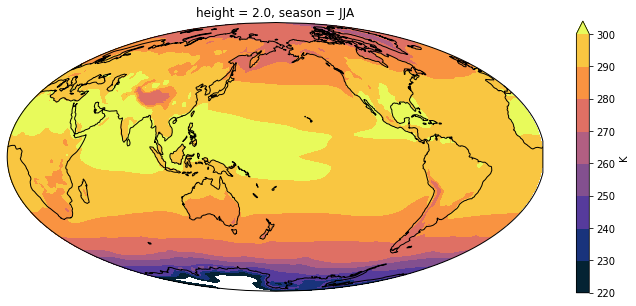

In [47]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude=180))


tempvar.sel(season='JJA').plot.contourf(ax=ax,
                                     levels=np.arange(0, 30, 1),
                     extend='max',
                  transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.vunits},
                   cmap='jet'),
ax.coastlines()

plt.show()


fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude=180))


climseas.sel(season='JJA').plot.contourf(ax=ax,
                                     levels=np.arange(220, 310, 10),
                     extend='max',
                  transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.thermal),
ax.coastlines()

plt.show()

In [144]:
#climallt = dset['tas']
#print(climallt.time)
#climallt['time'] = (climallt.time - np.datetime64('1850-01-16T00:00:00Z')) / np.timedelta64(1, 's')/3.154e+7

## Berkeley Earth - Making India Dataset from 1850-Present

In [333]:
#BERKELEY EARTH DATA

#indiadset = pd.read_csv('GlobalLandTemperaturesbyCountry.csv')
#
#indiadset = indiadset.sel(Country='India')
#indiadset.head()

indiadset = pd.read_csv('GlobalLandTemperaturesbyCountry.csv')

# making it same time frame as CMIP5 model (1850 on)
indiadset = indiadset[indiadset["dt"] >= "1850-01-16"][["dt", "AverageTemperature", "AverageTemperatureUncertainty", "Country"]]
indiadset = indiadset.groupby('Country').get_group('India')

indiadset["dt"] = pd.to_datetime(indiadset["dt"])
indiadset["year"] = indiadset["dt"].apply(lambda dt: dt.year)
indiadset["month"] = indiadset["dt"].apply(lambda dt: dt.month)

# only summer months JJA
indiadset = indiadset[indiadset["month"] >= 6]
indiadset = indiadset[indiadset["month"] <= 8]
print(indiadset)


               dt  AverageTemperature  AverageTemperatureUncertainty Country  \
244348 1850-06-01              28.790                          0.902   India   
244349 1850-07-01              27.063                          0.888   India   
244350 1850-08-01              26.111                          1.100   India   
244360 1851-06-01              28.498                          1.188   India   
244361 1851-07-01              26.798                          1.410   India   
...           ...                 ...                            ...     ...   
246293 2012-07-01              27.699                          0.227   India   
246294 2012-08-01              26.735                          0.348   India   
246304 2013-06-01              28.766                          0.299   India   
246305 2013-07-01              27.012                          0.197   India   
246306 2013-08-01              26.555                          0.242   India   

        year  month  
244348  1850     

In [350]:
varT = indiadset[["year", "AverageTemperature"]].groupby("year").var()
stdT = indiadset[["year", "AverageTemperature"]].groupby("year").std()

indiadset["variance"] = indiadset["year"].apply(lambda y: varT.loc[y])
indiadset["std"] = indiadset["year"].apply(lambda y: stdT.loc[y])
print(indiadset)

               dt  AverageTemperature  AverageTemperatureUncertainty Country  \
244348 1850-06-01              28.790                          0.902   India   
244349 1850-07-01              27.063                          0.888   India   
244350 1850-08-01              26.111                          1.100   India   
244360 1851-06-01              28.498                          1.188   India   
244361 1851-07-01              26.798                          1.410   India   
...           ...                 ...                            ...     ...   
246293 2012-07-01              27.699                          0.227   India   
246294 2012-08-01              26.735                          0.348   India   
246304 2013-06-01              28.766                          0.299   India   
246305 2013-07-01              27.012                          0.197   India   
246306 2013-08-01              26.555                          0.242   India   

        year  month  variance       std

        year  variance
244348  1850  1.844312
244349  1850  1.844312
244350  1850  1.844312
244360  1851  1.579036
244361  1851  1.579036
...      ...       ...
246293  2012  3.904244
246294  2012  3.904244
246304  2013  1.362314
246305  2013  1.362314
246306  2013  1.362314

[492 rows x 2 columns]


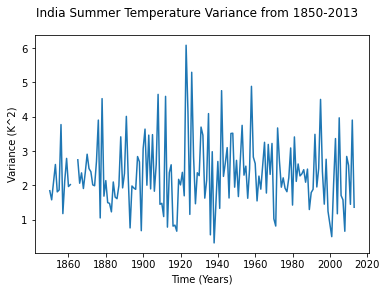

In [349]:
result = indiadset[["year", "variance"]]
print(result)

x = np.array(result['year'])
y = np.array(result['variance'])

#plot everything


fig = plt.figure()
plt.plot(x,y)
fig.suptitle('India Summer Temperature Variance from 1850-2013')
plt.xlabel('Time (Years)')
plt.ylabel('Variance (K^2)')
plt.show()
fig.savefig('test.jpg')

        year       std
244348  1850  1.358055
244349  1850  1.358055
244350  1850  1.358055
244360  1851  1.256597
244361  1851  1.256597
...      ...       ...
246293  2012  1.975916
246294  2012  1.975916
246304  2013  1.167182
246305  2013  1.167182
246306  2013  1.167182

[492 rows x 2 columns]


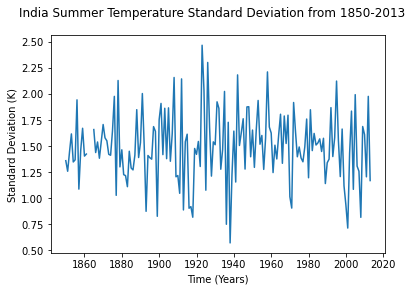

In [352]:
result2 = indiadset[["year", "std"]]
print(result2)

x = np.array(result2['year'])
y = np.array(result2['std'])

#plot everything

fig = plt.figure()
plt.plot(x,y)
fig.suptitle('India Summer Temperature Standard Deviation from 1850-2013')
plt.xlabel('Time (Years)')
plt.ylabel('Standard Deviation (K)')
plt.show()
fig.savefig('test.jpg')

In [320]:
variance = indiadset.groupby('year')['AverageTemperature'].var()
print(variance)

year
1850    1.844312
1851    1.579036
1852    2.083622
1853    2.609203
1854    1.811512
          ...   
2009    2.843921
2010    2.585760
2011    1.447577
2012    3.904244
2013    1.362314
Name: AverageTemperature, Length: 164, dtype: float64


In [ ]:
result = weather[["year", "month", "diff"]].groupby(by=["year", "month"]).sum().unstack().xs("diff", axis=1)[::-1]
result = result.reindex_axis(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], axis=1)


#plot everything
plt.figure(figsize=(12, 8))
sns.heatmap(result, yticklabels=8, cmap="gnuplot2", vmin=-3)

## Precipitation
opening precipitation

In [369]:
access_tas_hist_file = 'hurs_Amon_CCSM4_historical_r1i1p1_185001-200512.nc'
dset = xr.open_dataset(access_tas_hist_file)
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 1872)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    hurs       (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                historical
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SD BC MD OC Oz AA LU
    parent_experiment_id:         piControl
    parent_experiment_rip:        r1i1p1
    branch_time:              

In [370]:
rain = dset['hurs'].groupby('time.season').mean() 
print(rain)

<xarray.DataArray 'hurs' (season: 4, lat: 192, lon: 288)>
array([[[ 93.26011 ,  93.38977 ,  93.42735 , ...,  93.45879 ,
          92.92977 ,  93.15023 ],
        [ 92.021454,  92.2495  ,  92.118904, ...,  91.941765,
          91.75226 ,  92.286674],
        [ 90.78552 ,  90.744225,  90.96148 , ...,  90.31391 ,
          90.35068 ,  90.32843 ],
        ...,
        [100.74041 , 100.76737 , 100.78633 , ..., 100.66351 ,
         100.69118 , 100.71356 ],
        [100.71834 , 100.72279 , 100.72907 , ..., 100.691284,
         100.703995, 100.71241 ],
        [100.619965, 100.62047 , 100.62094 , ..., 100.61764 ,
         100.618484, 100.61923 ]],

       [[ 96.4732  ,  96.47841 ,  96.45687 , ...,  96.45271 ,
          96.419624,  96.43016 ],
        [ 95.43535 ,  95.50686 ,  95.54405 , ...,  95.33876 ,
          95.346535,  95.38917 ],
        [ 94.09149 ,  94.15396 ,  94.13018 , ...,  94.18597 ,
          94.17338 ,  94.29922 ],
...
        [ 98.15767 ,  98.17089 ,  98.1794  , ...,  98.11732

In [379]:
indiarain = rain.sel(lat=slice(0,30), lon=slice(60,110), season='JJA')
indiarain['hurs'] = indiarain['hurs']
print(indiarain)

KeyError: 'hurs'

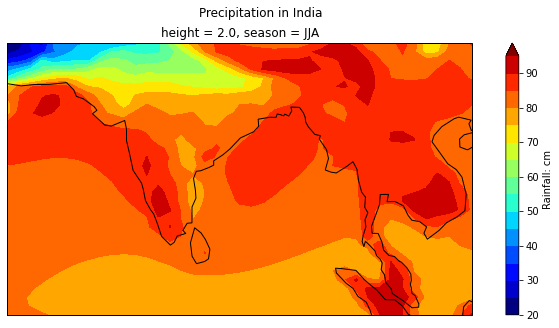

In [381]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

indiarain.plot.contourf(ax=ax,
                         levels=np.arange(20, 100, 5),
                         extend='max',
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'label': 'Rainfall: cm'},
                         cmap='jet')
ax.coastlines()
fig.suptitle('Precipitation in India')

plt.show()